#                 INTRODUCTION 

Dans ce notebook, nous allons analyser les données des dessins animées sorties sur certaines période

L'objectif sera d'identifier les facteurs qui ont générer les plus de revenus par prodution.

Tout au long de ce rapport nous nous poserons des questions pertinentes et essayerons d'y repondre avec du code et de la visualisation de données.

Le plan de notre analyse sont les suivants :

* Import des différentes librairies de Python

* Decouvertes et bref aperçu de nos données

* Nettoyage et Transformation de nos données

* Analyse exploratoire de données 

* Visualisation 

In [1]:
# Importer les librairies de Python
import pandas as pd
import numpy as  np
import os
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style("darkgrid", {"axes.facecolor": "#121212","grid.color": "#FFD700", "grid.linestyle": "--"})
sns.set_palette("husl", n_colors=8)

In [2]:
# Decouvertes de données 
dossier_actuel = os.getcwd()  # Montage de disque local 
chemin_fichier = os.path.join(dossier_actuel, 'movie_animation.csv') # joindre le fichier 
df = pd.read_csv(chemin_fichier) # lire le fichier CSV 

In [3]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [4]:
# Obtenir la dimension du DataFrame 
df.shape

(51945, 23)

In [5]:
# Description du DataFrame et obtenir les nfo statistiques  
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,5.194500e+04,51945.000000,51945.000000,5.194500e+04,51945.000000,5.194500e+04,51945.000000
mean,6.188122e+05,2.597083,40.395380,1.863464e+06,20.901415,5.759513e+05,1.886233
std,3.479748e+05,3.318748,482.705948,3.049824e+07,39.016002,7.606628e+06,9.700913
min,1.200000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.300810e+05,0.000000,0.000000,0.000000e+00,3.000000,0.000000e+00,0.600000
50%,6.119150e+05,0.000000,0.000000,0.000000e+00,7.000000,0.000000e+00,0.600000
75%,9.159040e+05,6.000000,2.000000,0.000000e+00,19.000000,0.000000e+00,0.882000
max,1.238314e+06,10.000000,19463.000000,1.450027e+09,3720.000000,2.600000e+08,1008.942000


In [6]:
df.describe(include='object')

,title,status,release_date,backdrop_path,homepage,imdb_id,original_language,original_title,overview,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
count,51944,51945,49808,15835,8253,29552,51945,51944,45866,37934,4678,51945,29398,39700,33818
unique,49381,6,16893,15731,7461,29545,102,50318,44907,37819,4451,2649,11196,1096,617
top,Little Red Riding Hood,Released,2017-01-01,/7tFOLDhZqKPactVlGfdjgVmYnlu.jpg,https://animation.geidai.ac.jp,tt27048168,en,Metamorphosis,An Aesop’s Film Fables cartoon.,/tVRb7CCGuru9RdG1ikGFCceuegy.jpg,animation short,Animation,ONF | NFB,United States of America,English
freq,15,51134,291,17,147,2,28584,9,71,12,104,28393,717,12836,12005


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

# Nettoyage et tranformation de données 

In [8]:
# Suppression des colonnes indésirables 
df.drop(['backdrop_path', 'poster_path', 'id', 'overview', 'homepage', 'tagline', 'imdb_id'], axis=1, inplace=True)

In [9]:
df.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages
0,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,107.292,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,en,Up,90.968,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,55.456,"Animation, Family",Pixar,United States of America,English
3,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,en,Coco,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,en,WALL·E,58.517,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [10]:
#  Recherche de doublons 
df.loc[df.duplicated()]

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages
26479,Entre Elle & Lui - 11 A la fin du 1er trimestre,0.0,0,Released,NaN,0,0,False,0,fr,Entre Elle & Lui - 11 A la fin du 1er trimestre,0.6,Animation,NaN,NaN,NaN
29741,Haïku,0.0,0,Released,2001-01-01,0,1,False,0,en,Haïku,0.6,Animation,NaN,Belgium,No Language
45068,The Head Saves The Earth,0.0,0,Released,1995-09-12,0,110,False,0,en,The Head Saves The Earth,0.6,"Science Fiction, Comedy, Animation","MTV Animation, Fogelmania Productions",NaN,NaN


In [11]:
# Supprimer les doublons 
df.drop([26479, 29741, 45068], inplace=True)

In [12]:
df.loc[df.duplicated()]

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages


In [13]:
# Changer le format des dates en yyyy-mm-dd
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

Spilter le Genre pour les infos 

In [14]:
genre = {}
for row in df["genres"].str.split(","):
    for word in row:
        word = word.strip()
        if word in genre:
            genre[word] += 1
        else:
            genre[word] = 1
genres_df = pd.DataFrame.from_dict([genre]).T.sort_values(by=0, ascending=False).head(10)

In [15]:
# Suprimmer Animation dans le colonnes genre  
genres_df.drop('Animation', inplace=True)

In [16]:
genres_df

,0
Comedy,7878
Family,7480
Fantasy,3896
Adventure,3539
Drama,2849
Science Fiction,2539
Action,2428
Documentary,1897
Music,1697


In [18]:
# Afficher les nombres des languages originals 
df['original_language'].value_counts()

original_language
en    28582
ja     5330
fr     2997
ru     2871
es     1472
      ...  
cr        1
af        1
te        1
zu        1
ne        1
Name: count, Length: 102, dtype: int64

In [20]:
# Afficher les statues 
df['status'].value_counts()

status
Released           51131
In Production        381
Planned              305
Post Production       97
Canceled              17
Rumored               11
Name: count, dtype: int64

# Visualisation de données 

In [21]:
# Versions originals  
origin_group_lang = df.groupby('original_language').size().sort_values(ascending=False).head(7)
origin_group_lang

original_language
en    28582
ja     5330
fr     2997
ru     2871
es     1472
de     1266
xx     1011
dtype: int64

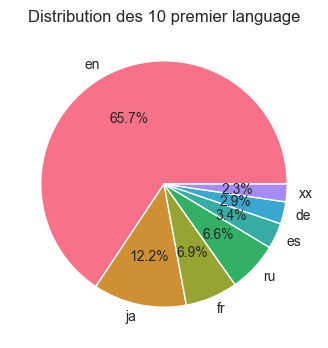

In [23]:
plt.figure(figsize=(4,4))
plt.title("Distribution des 10 premier language")
plt.pie(origin_group_lang, labels=origin_group_lang.index, autopct='%1.1f%%')
plt.show()

In [24]:
# Productions par Pays  
prod_countr_group = df.groupby('production_countries').size().sort_values(ascending=False).head(7)
prod_countr_group

production_countries
United States of America    12836
Japan                        5182
France                       2136
United Kingdom               1854
Canada                       1616
Soviet Union                 1556
Germany                       980
dtype: int64

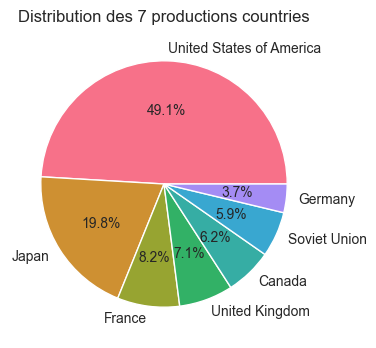

In [25]:
plt.figure(figsize=(4,4))
plt.title("Distribution des 7 productions countries")
plt.pie(prod_countr_group, labels=prod_countr_group.index, autopct='%1.1f%%')
plt.show()

In [26]:
# Meuilleurs Producteurs 
prod_comp_group = df.groupby('production_companies').size().sort_values(ascending=False).head(7)
prod_comp_group

production_companies
ONF | NFB                       717
Soyuzmultfilm                   657
Walt Disney Productions         555
Walter Lantz Productions        511
Fleischer Studios               399
Tokyo University of the Arts    339
Famous Studios                  335
dtype: int64

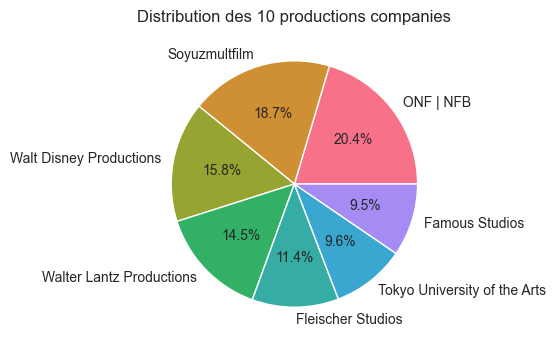

In [27]:
plt.figure(figsize=(4,4))
plt.title("Distribution des 10 productions companies")
plt.pie(prod_comp_group, labels=prod_comp_group.index, autopct='%1.1f%%')
plt.show()

In [28]:
# Anime le plus rentable 
grossing_movies = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)

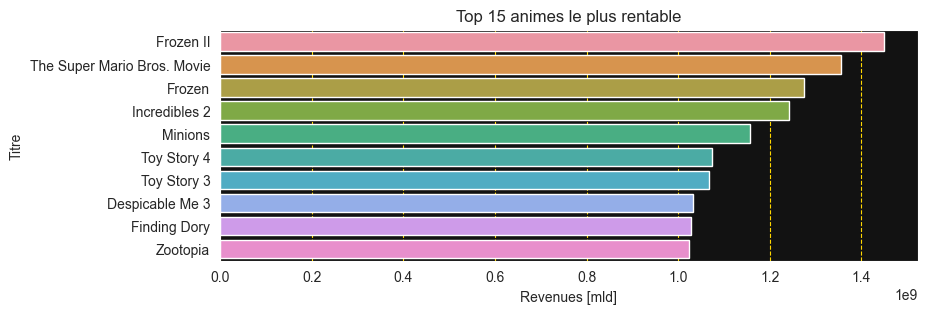

In [29]:
plt.figure(figsize=(9, 3))
plt.title("Top 15 animes le plus rentable")
sns.barplot(data=grossing_movies, y='title', x='revenue', orient='h')
plt.xlabel('Revenues [mld]')
plt.ylabel("Titre")
plt.show()

In [30]:
# Budget plus élevé 
budget_movies = df[['title', 'budget']].sort_values(by='budget', ascending=False).head(10)

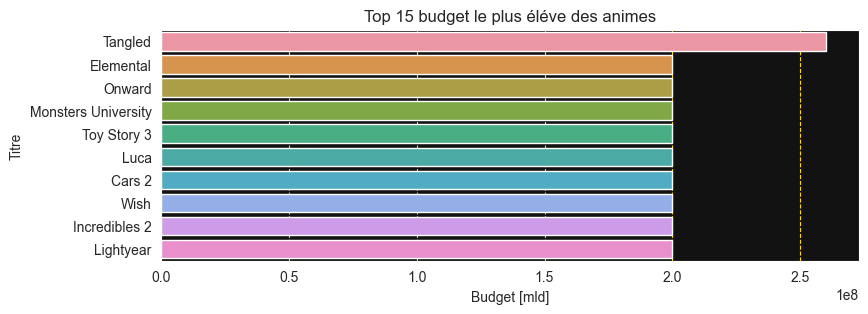

In [31]:
plt.figure(figsize=(9, 3))
plt.title("Top 15 budget le plus éléve des animes")
sns.barplot(data=budget_movies, y='title', x='budget', orient='h')
plt.xlabel('Budget [mld]')
plt.ylabel("Titre")
plt.show()

In [32]:
# Plus long Anime en min  
movies_long = df[['title', 'runtime']].sort_values(by='runtime', ascending=False).head(10)

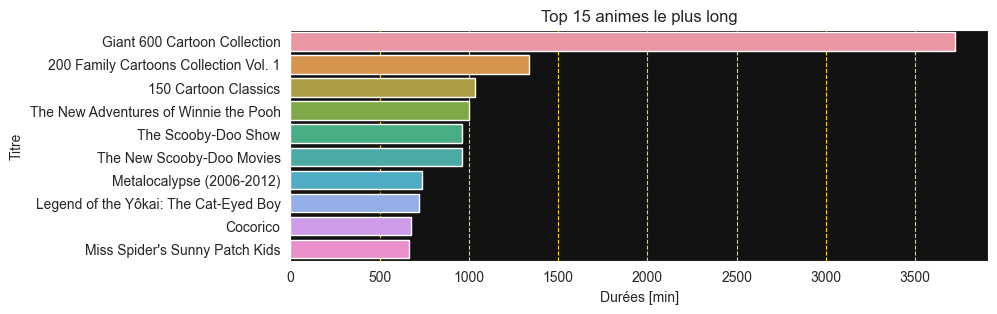

In [33]:
plt.figure(figsize=(9, 3))
plt.title("Top 15 animes le plus long")
sns.barplot(data=movies_long, y='title', x='runtime', orient='h')
plt.xlabel('Durées [min]')
plt.ylabel("Titre")
plt.show()

In [34]:
# Les plus populaire 
popular_movies = df[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

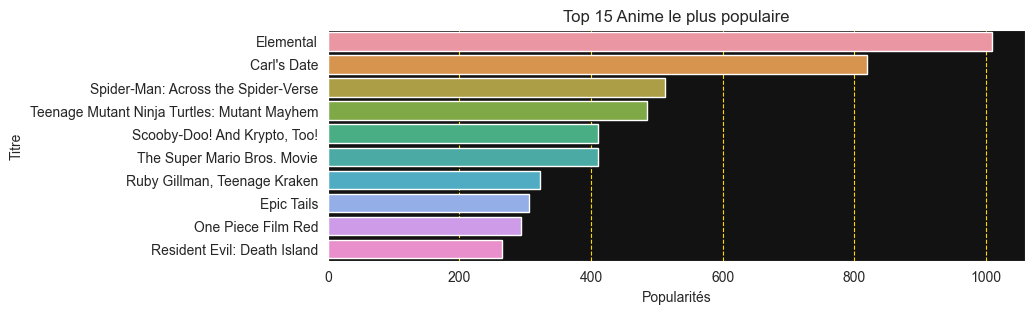

In [35]:
plt.figure(figsize=(9, 3))
plt.title("Top 15 Anime le plus populaire")
sns.barplot(data=popular_movies, y='title', x='popularity', orient='h')
plt.xlabel('Popularités')
plt.ylabel("Titre")
plt.show()

In [36]:
# Nombres de film réalisé par années  
release_year = df.groupby(df.release_date.dt.year)['title'].count()

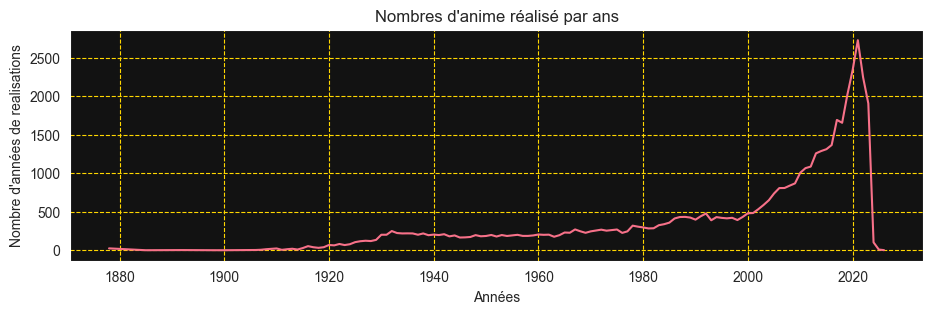

In [38]:
plt.figure(figsize=(11,3))
release_year.plot()
plt.title("Nombres d'anime réalisé par ans")
plt.ylabel("Nombre d'années de realisations")
plt.xlabel("Années")
plt.show()

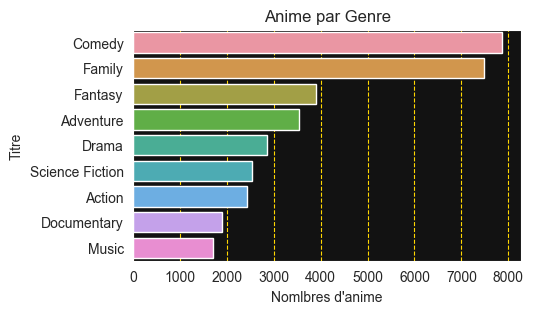

In [39]:
# Nombres d'animé par genre 
plt.figure(figsize=(5,3))
plt.title("Anime par Genre")
sns.barplot(data=genres_df, y=genres_df.index, x=0, orient='h')
plt.xlabel('Nomlbres d\'anime')
plt.ylabel('Titre')
plt.show()

# CONCLUSION 

Dans notre analyse, nous pouvons identifier à partir de notre analyse les informations suivantes :


-Le nombre de productions par Pays 

-Meuilleurs compagnie Producteurs

-les Animes qui on générées plus de revenus

-Budget plus élevé pour la production  

-Durée des animées le plus long (en minute)

-Les plus populaire 

-Nombres d'animé par genre